## Homework 5 - CS 559
Matt Kearney -
Prof. Insuk Jang - 
Fundamentals of ML - 
30.3.24

In [938]:
import pandas as pd
import numpy as np

test = pd.read_csv('kernel_ridge_test.csv') #removed comma at beginning -> "   Unnamed: 0"
train = pd.read_csv('kernel_ridge_train.csv')  # ^^

In [939]:
print(train.head(5))
print("\n-------------[obs 5 - obs 44]-------------\n")
print(train.tail(5))

rows_train, cols_train = train.shape
print(f"\nTest shape:\n\tRows: {rows_train}\n\tColumns: {cols_train}")

train.describe()

          x1        x2        x3         Y
0 -12.566371  3.617242  0.204829 -2.000000
1 -12.053458  4.319111  2.582332 -1.918367
2 -11.540544  1.778165  2.468020 -1.836735
3 -11.027631  0.374609  2.057867 -1.755102
4 -10.514718 -1.089312  3.089581 -1.673469

-------------[obs 5 - obs 44]-------------

           x1        x2        x3         Y
45  10.514718 -1.358345 -3.751502  1.673469
46  11.027631  0.323126 -5.663733  1.755102
47  11.540544  4.588643 -6.308534  1.836735
48  12.053458  4.763386 -1.897627  1.918367
49  12.566371  8.524086  0.919631  2.000000

Test shape:
	Rows: 50
	Columns: 4


,x1,x2,x3,Y
count,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,-9.237056e-16,0.676566,0.397804,-1.243450e-16
std,7.476929e+00,2.501394,2.211010,1.189990e+00
min,-1.256637e+01,-6.409929,-6.308534,-2.000000e+00
25%,-6.283185e+00,-0.903665,-0.773674,-1.000000e+00
50%,-8.881784e-16,0.506599,0.669575,0.000000e+00
75%,6.283185e+00,1.737709,1.985352,1.000000e+00
max,1.256637e+01,8.524086,5.311137,2.000000e+00


In [940]:
print(test.head(5))

rows_test, cols_test = test.shape
print(f"\nTest shape:\n\tRows: {rows_test}\n\tColumns: {cols_test}")

test.describe()

          x1   x2            x3    Y
0 -12.566371  5.0  2.449294e-15 -2.0
1  -6.283185  2.0  4.898587e-16 -1.0
2   0.000000  1.0  0.000000e+00  0.0
3   6.283185  2.0 -4.898587e-16  1.0
4  12.566371  5.0 -2.449294e-15  2.0

Test shape:
	Rows: 5
	Columns: 4


,x1,x2,x3,Y
count,5.000000,5.000000,5.000000e+00,5.000000
mean,0.000000,3.000000,0.000000e+00,0.000000
std,9.934588,1.870829,1.766211e-15,1.581139
min,-12.566371,1.000000,-2.449294e-15,-2.000000
25%,-6.283185,2.000000,-4.898587e-16,-1.000000
50%,0.000000,2.000000,0.000000e+00,0.000000
75%,6.283185,5.000000,4.898587e-16,1.000000
max,12.566371,5.000000,2.449294e-15,2.000000


We have 50 observations with 3 features in our training data and our test data targets to a vector of size 50. Our Kernel matrix should be N x N (50 x 50) and be 1.) semi-positive and 2.) definite. <br><br>

X1 ~ Uniform(-12.56, 12.56) <br>
X2 ~ about Normal(mean = 0.67, std = 2.5) <br>
X3 ~ about Normal(mean = 0.40, std = 2.2) <br>
Y  ~ Uniform(-2.0, 2.0) 

We have non-linear fitting data.

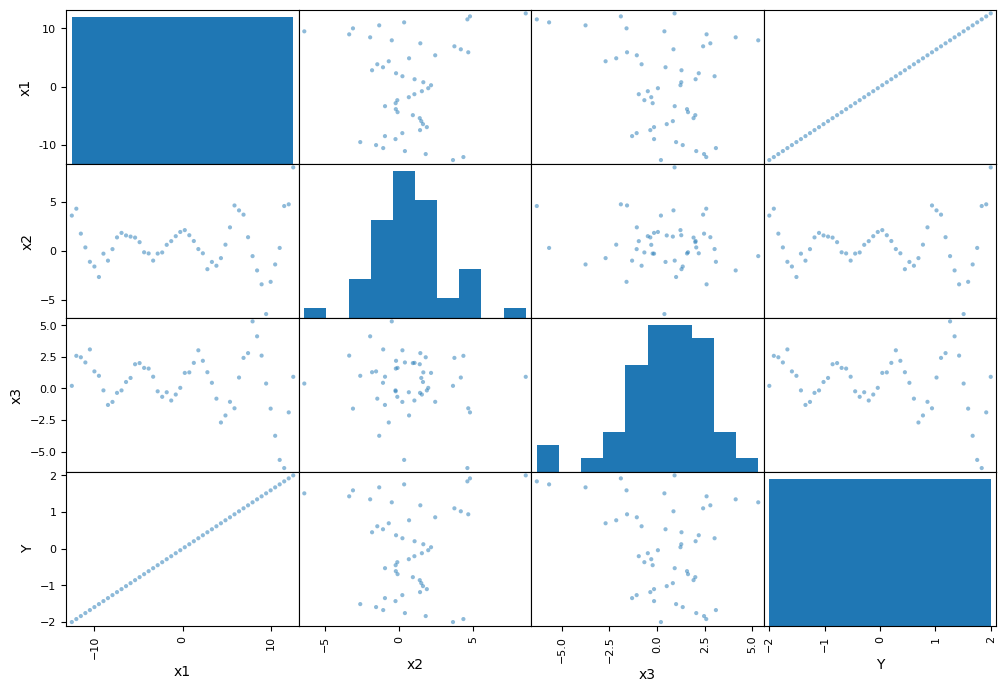

In [941]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(train[train.columns.tolist()], figsize=(12,8))
plt.show()

In [942]:
def show_training_hist():
    train.hist(bins=50, figsize=(20,15))
    plt.show()

# show_training_hist()

It is suggested that x1 is directly correlated to the target Y

In [943]:
corr_matrix = train[train.columns.tolist()].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,Y
x1,1.000000,0.045623,-0.285750,1.000000
x2,0.045623,1.000000,-0.119596,0.045623
x3,-0.285750,-0.119596,1.000000,-0.285750
Y,1.000000,0.045623,-0.285750,1.000000


In [944]:
corr_matrix['Y'].sort_values(ascending=False)

Y     1.000000
x1    1.000000
x2    0.045623
x3   -0.285750
Name: Y, dtype: float64

### Data normalization

In [945]:
x1_min = train['x1'].min()
x1_max = train['x1'].max()
x1_norm = (train['x1'] - x1_min ) / (x1_max -x1_min)
train['x1'] = x1_norm

In [946]:
x2_min = train['x2'].min()
x2_max = train['x2'].max()
x2_norm = (train['x2'] - x2_min ) / (x2_max -x2_min)
train['x2'] = x2_norm

In [947]:
x3_min = train['x3'].min()
x3_max = train['x3'].max()
x3_norm = (train['x3'] - x3_min ) / (x3_max -x3_min)
train['x3'] = x3_norm

In [948]:
y_min = train['Y'].min()
y_max = train['Y'].max()
y_norm = (train['Y'] - y_min ) / (y_max -y_min)
train['Y'] = y_norm

In [949]:
train.describe()

# show_training_hist()

,x1,x2,x3,Y
count,50.000000,50.000000,50.000000,50.000000
mean,0.500000,0.474520,0.577154,0.500000
std,0.297498,0.167496,0.190282,0.297498
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.368706,0.476335,0.250000
50%,0.500000,0.463139,0.600543,0.500000
75%,0.750000,0.545576,0.713780,0.750000
max,1.000000,1.000000,1.000000,1.000000


Underlying data did not change, but now are related in the same range and are more ready for best learning conditions.

### b. Train the NumPy implemented kernel ridge regression model with the polynomial kernel function,<br>        k = ⟨x,z⟩^d <br> Find the best model with the lowest MSE value as the degree, d, increases from 2 to 11.

In [950]:
X = pd.DataFrame()
X['x1'], X['x2'], X['x3'] = train['x1'], train['x2'], train['x3']

In [951]:
def phi_p(X1,X2,k):
    return (np.dot(X1,X2))**k

def kernel_matrix(X, l, k, kernel_func):
    N = len(X)
    K = np.zeros((N,N)) #make empty K
    for i in range(N):
        for j in range(N):
            inner = kernel_func(X[i].T,X[j].T,k)
            # print(f"i: {i}\tj: {j}\tres: {inner}")
            K[i][j] = inner
            if j == i:
                K[i][j] += l 
    return K 


In [952]:
x1 = X['x1'].tolist()
x2 = X['x2'].tolist()
x3 = X['x3'].tolist()

a = np.array([x1, x2, x3])
l = 0 # for linear regression
gram = 1 #k, degree =1

In [953]:
kt = kernel_matrix(a.T,l,gram, phi_p) #note: must transpose a to achieve kernel matrix...

print(kt.shape) #our kernel matrix is 50x50 
print(train['x1'].shape)

#checking validity
print(f"x1*K*x1: \t{np.matmul(np.matmul(train['x1'].tolist(), kt), train['x1'])}")
print(f"x2*K*x2: \t{np.matmul(np.matmul(train['x2'].tolist(), kt), train['x2'])}")
print(f"x3*K*x3: \t{np.matmul(np.matmul(train['x3'].tolist(), kt), train['x3'])}")

(50, 50)
(50,)
x1*K*x1: 	612.8088212843707
x2*K*x2: 	485.4170029919329
x3*K*x3: 	708.0259206831522


Thus, the kernel K is a semi-positive definite matrix as v^T*G*v >= 0.

In [954]:
def compute_w(y, K):
    invK = np.linalg.inv(K)
    # print(y.shape, invK.shape)
    a = np.matmul(y.T, invK)
    return a

In [955]:
y = np.array(train['Y'])
N = len(X)
w = compute_w(y, kt)
# print(a.shape)
w

array([-1.25      , -0.25      , -0.875     , -0.84375   , -0.125     ,
        1.75      ,  3.25      ,  0.625     ,  0.        , -5.        ,
       -2.4296875 ,  4.1875    ,  1.53125   ,  1.359375  ,  0.5       ,
       -1.75      , -0.25      ,  3.1875    , -3.90625   ,  2.5625    ,
        5.25      , -2.5625    ,  1.8125    , -0.5625    ,  2.375     ,
       -0.3125    , -0.875     , -3.5       ,  0.25      , -1.25      ,
       -2.06640625, -1.25      ,  3.78125   , -1.75      ,  3.375     ,
       -4.625     , -1.5625    ,  1.        ,  3.1875    ,  0.5       ,
       -3.75      , -0.75      , -0.9375    ,  0.5703125 , -2.875     ,
        0.5625    , -1.        , -5.1875    , -0.375     ,  0.        ])

In [956]:
def train_prediction(w, x, X, k, kernel_func):
    y_pred = []
    for i in range(len(x)):
        test = x[i]
        s = 0.0
        for j in range(N):
            train = X[j]
            kT = kernel_func(test, train, k)
            s += w[j]*kT
        y_pred.append(s)
    return y_pred

y_pred = train_prediction(w, a.T, a.T, gram, phi_p)
print(y_pred)

[-6.436032139446553, -7.804354274756944, -6.952057298664196, -6.456110195059641, -6.4563488997429195, -5.855591125296535, -5.518888286658994, -6.293510746214994, -5.810880214409265, -6.598453699057292, -7.5676256923093295, -8.048760095057904, -8.407517747875643, -8.699924660726996, -9.274744820860484, -9.341767130765646, -9.00756871292248, -9.164987937343493, -8.858290962001185, -8.956275615793496, -9.068582512590758, -9.739029547881962, -9.879359580478255, -10.47986999777696, -11.069951441193169, -11.798083979396337, -11.824977187069964, -12.080349294278212, -12.330441715905804, -12.078776550554561, -11.316455243987741, -11.538054069055589, -11.151587616305903, -11.008153481053128, -11.990886010541482, -13.322920467971983, -14.26973208595287, -15.169113112481856, -15.77861906353727, -15.203246317663686, -15.550454695006486, -14.753134734389945, -13.849184549896403, -12.041142802507089, -12.883667852710522, -13.051206325827774, -13.269115849808214, -14.997141983139864, -16.885212495582

In [957]:
def MSE(y, y_hat, init, leny):
    if len(y) == 0:
        return init/leny
    else: 
        return MSE(y[1:], y_hat[1:], init+(y[0]-y_hat[0])**2, leny)
    
MSE(y, y_pred, 0, N)

140.08658085500429

In [958]:
k_list = range(2, 12)
d = k_list[0]
a = np.array([x1, x2, x3])
y = np.array(train['Y'])
l = 0 # for linear regression
MSEs = []
N = len(y)
for i in k_list:
    k = i
    kt = kernel_matrix(a.T, l, k, phi_p)
    w = compute_w(y, kt)
    y_pred = train_prediction(w, a.T, a.T, k, phi_p)
    mse= MSE(y, y_pred, 0, N)
    MSEs.append(mse)
    print(f"k: {i}\tMSE: {mse}")

print(min(MSEs))

k: 2	MSE: 2447.228210399394
k: 3	MSE: 59004.111172672194
k: 4	MSE: 6128043981.3570385
k: 5	MSE: 543861585004.6898
k: 6	MSE: 418879613493.8173
k: 7	MSE: 369854136065.06024
k: 8	MSE: 740185725501.0485
k: 9	MSE: 130258107360.19962
k: 10	MSE: 409631691.17046946
k: 11	MSE: 271964297.4684502
2447.228210399394


The best model according to the presented MSEs would be upon k = 2 (save k = 1 which uses Gram), however it is important to notice that our MSE reaches a peak at k = 7 after which it will drop by orders of magnitude. I am interested as to whether this trend will continue to decrease past k = 11 so we can use this knowledge to drive our MSE down. It is clear that the best model from the kernel ridge regression model using polynomial kernel function is at degree = 2.  

### b. Write a code that constructs the kernel matrix with RBF kernel function, k(x,z) = exp(−γ|x−z|2). <br> The RBF kernel function must be computed using NumPy. With 10 different γ parameter <br> values, train the rbf-kernel ridge regression models and find the best model.

In [959]:
e=2.71828
def rbf(x, z, l): # x and z are the same thing...
    return e**(-l*(np.linalg.norm(x - z)**2))


In [960]:
a = np.array([x1, x2, x3])
y = np.array(train['Y'])
l=2
kt = kernel_matrix(a.T,l,gram, rbf) #note: transpose a to achieve kernel matrix...
print(kt.shape) # Kernel matrix is N x N
kt

(50, 50)


array([[3.        , 0.95648461, 0.94670535, ..., 0.28982569, 0.36853164,
        0.32898582],
       [0.95648461, 3.        , 0.97096725, ..., 0.23059588, 0.34315739,
        0.34667863],
       [0.94670535, 0.97096725, 3.        , ..., 0.23472974, 0.34561987,
        0.31923229],
       ...,
       [0.28982569, 0.23059588, 0.23472974, ..., 3.        , 0.86532107,
        0.63250215],
       [0.36853164, 0.34315739, 0.34561987, ..., 0.86532107, 3.        ,
        0.88460405],
       [0.32898582, 0.34667863, 0.31923229, ..., 0.63250215, 0.88460405,
        3.        ]])

Confirm K as definite semi-positive

In [961]:
#checking validity
print(f"x1*K*x1: \t{np.matmul(np.matmul(train['x1'].tolist(), kt), train['x1'])}")
print(f"x2*K*x2: \t{np.matmul(np.matmul(train['x2'].tolist(), kt), train['x2'])}")
print(f"x3*K*x3: \t{np.matmul(np.matmul(train['x3'].tolist(), kt), train['x3'])}")

x1*K*x1: 	510.862975252928
x2*K*x2: 	454.0113178083483
x3*K*x3: 	694.0665066317179


In [962]:
a = np.array([x1, x2, x3])
y = np.array(train['Y'])
y = y.T
l_list= [0.001, 0.0055, 0.01, 0.055, 0.1, 0.55, 1, 5.5, 10, 55.5]
MSEs = []
# a = a.T

for l in l_list:
    kt = kernel_matrix(a.T,l,k, rbf)
    w = compute_w(y, kt)
    y_pred = train_prediction(w, a.T, a.T, k, rbf)
    mse= MSE(y, y_pred, 0, N)
    MSEs.append(mse)
    print(f"k: {l}\tMSE: {mse}")

min(MSEs)

k: 0.001	MSE: 3.1324018002129937e-07
k: 0.0055	MSE: 4.573136120579175e-06
k: 0.01	MSE: 1.1134315163463175e-05
k: 0.055	MSE: 0.0001669371235111031
k: 0.1	MSE: 0.00046443221109353336
k: 0.55	MSE: 0.007624132045423041
k: 1	MSE: 0.01750652382006026
k: 5.5	MSE: 0.09669950633834659
k: 10	MSE: 0.14176103191259273
k: 55.5	MSE: 0.26612132305239994


3.1324018002129937e-07

The best model obtained from using the Kernel Matrix obtained through RBF was in the last iteration with the highest lambda @ l = 0.001. It is likely true that even smaller lambda results may product best outcomes. 

### d. Construct a kernel function, the product poly-kernel and rbf-kernel functions, and <br>train the kernel ridge regression model. Find the best model with the combinations of d and <br>γ values used in b and c. There must be a total of 100 combinations

In [963]:
d_list = range(2,12) # vals from b)
l_list = [0.001, 0.0055, 0.01, 0.055, 0.1, 0.55, 1, 5.5, 10, 55.5] # vals from c)
d, l = d_list[0], l_list[0]

def res(x, z, k, g):
    def rbf(x, z, l): # x and z are the same thing...
        return e**(-l*(np.linalg.norm(x - z)**2))
    def phi_p(x, z, k):
        return (np.dot(x,z))**k
    return rbf(x, z, g)*phi_p(x, z, l)

def kernel_matrix_pkf_rbf(X, k, g):
    N = len(X)
    K = np.zeros((N,N)) #make empty K
    for i in range(N):
        for j in range(N):
            inner = res(X[i].T, X[j].T, k, g)
            # print(f"i: {i}\tj: {j}\tres: {inner}")
            K[i][j] = inner
            if j == i:
                K[i][j] += l 
    return K 

def train_prediction(w, x, X, k, g):
    N = len(X)
    
    y_pred = []
    for i in range(len(x)):
        test = x[i]
        s = 0.0
        for j in range(N):
            train = X[j]
            kT = res(test, train, k, g)
            s += w[j]*kT
        y_pred.append(s)
    return y_pred


MSEs = []
for poly in d_list:
    for rbf in l_list: 
        kt = kernel_matrix_pkf_rbf(a.T, poly, rbf)
        w = compute_w(y.T, kt)
        y_pred = train_prediction(w, a.T, a.T, poly, rbf)
        mse= MSE(y, y_pred, 0, N)
        MSEs.append(mse)
        with open("results.txt", "a") as fl:
            print(f"degree: {poly}\tgamma: {rbf}\tmse: {mse}", file=fl)

minm = 1
it = 0
for i in MSEs:
    if i < minm: 
        minm = i
    it=it+1

print("Minimum MSE (best model): " + str(minm) + " at iteration = " + str(it))

Minimum MSE (best model): 1.934677764515809e-07 at iteration = 100


We can see that the lowest obtained MSE was in using gamma = 55.5 and at all degrees in the range(2, 11). We can check 'results.txt' to confirm that our minimum MSE = 1.9347e-07 is reported each time tests with gamma=55.5 are used, regardless of degree. Across using the polynomial, radian-basis (gaussian), and the kernel function on the product of the two, it has been identified that the best model was found using the product kernel with hyperparameters gamma = 55.5 (high-end) and using any degree, d, in range(2,11).

Thus, for simplicity we will use gamma = 55.5 and k, degree = 11 (as results are only dependent on gamma in the product of the gaussian and the polynomial kernel function). This means these results are stored in our prior computations for finding kt, w(a), y_pred, and the MSE. This means that our y_pred values are currently stored in the environment. Let's observe our predicted values and compare against the actual target values. We must have very accurate results as our error is on the order of 10^(-7).

In [964]:
tupes= []
for i, x in zip(y, y_pred):
    tupes.append((i, x))
print("(actual, predicted)")
tupes

(actual, predicted)


[(0.0, 7.070341085321346e-06),
 (0.02040816326530609, 0.02039135705724083),
 (0.040816326530612235, 0.04079850334333352),
 (0.06122448979591838, 0.061211341387641664),
 (0.08163265306122452, 0.08156577463934017),
 (0.10204081632653061, 0.10205633336364854),
 (0.12244897959183676, 0.12233496849581847),
 (0.14285714285714285, 0.14283251133861413),
 (0.16326530612244894, 0.1631812414629868),
 (0.18367346938775508, 0.1835838529420948),
 (0.20408163265306123, 0.20427792389130486),
 (0.22448979591836732, 0.22412722008779676),
 (0.24489795918367352, 0.24498194551586092),
 (0.26530612244897955, 0.26525527009574634),
 (0.2857142857142857, 0.28562323359246783),
 (0.3061224489795918, 0.30595566030507787),
 (0.32653061224489793, 0.32678794148663515),
 (0.3469387755102041, 0.34670241105248784),
 (0.36734693877551017, 0.367099724972264),
 (0.3877551020408163, 0.38778422853182076),
 (0.4081632653061224, 0.40779977768198045),
 (0.42857142857142855, 0.4289580617891318),
 (0.44897959183673464, 0.4486871

Across the board, our estimated y-values are very close (negligably distant) to each other, meaning our 'mixed' model with degree = 11 and gamma = 55.5 performs very accurately and with very low mean squared error. We have successfully given our non-linear data linearity through the kernel method such that we could solve a linear model to estimate predictors.